#                                Titanic-like Train disaster

## Table des matières

* [Importations des libraires et données](#chapter1)
* [Pre-Processing](#chapter2)
* [Modélisation](#chapter3)
* [Conclusion et pistes d'amélioration](#chapter4)

## 1. Importations des libraires et données : <a class="anchor" id="chapter1"></a>

In [1]:
#imports des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

C:\Users\hamza\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#Lecture du fichier Data.csv en utilisant une expression régulaire en tant que séparateur
df = pd.read_csv("Data.csv", engine='python', sep='(?<=[\w"]),(?![\s])|(?<=,)(?=,)')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,nb_siblings,nb_parents,Ticket,Fare,Cabin,Station
0,"""1",0,3,"""""Braund, Mr. Owen Harris""""",male,22.0,1,0,A/5 21171,7.2500,NaN,",S"""
1,"""2",1,1,"""""Cumings, Mrs. John Bradley (Florence Briggs ...",female,38.0,1,0,PC 17599,71.2833,C85,"C"""
2,"""3",1,3,"""""Heikkinen, Miss. Laina""""",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,",S"""
3,"""4",1,1,"""""Futrelle, Mrs. Jacques Heath (Lily May Peel)""""",female,35.0,1,0,113803,53.1000,C123,"S"""
4,"""5",0,3,"""""Allen, Mr. William Henry""""",male,35.0,0,0,373450,8.0500,NaN,",S"""
...,...,...,...,...,...,...,...,...,...,...,...,...
886,"""887",0,2,"""""Montvila, Rev. Juozas""""",male,27.0,0,0,211536,13.0000,NaN,",S"""
887,"""888",1,1,"""""Graham, Miss. Margaret Edith""""",female,19.0,0,0,112053,30.0000,B42,"S"""
888,"""889",0,3,"""""Johnston, Miss. Catherine Helen """"""""Carrie""""...",female,NaN,",1",2,W./C. 6607,23.4500,NaN,",S"""
889,"""890",1,1,"""""Behr, Mr. Karl Howell""""",male,26.0,0,0,111369,30.0000,C148,"C"""


In [4]:
#Suppression de certaines virgules et des guillemets
df["PassengerId"] = df["PassengerId"].str.replace('[\"\,]',"")
df["Name"] = df["Name"].str.replace('[\"\,]',"")
df["Station"] = df["Station"].str.replace('[\"\,]',"")
df["nb_siblings"] = df["nb_siblings"].str.replace('[\"\,]',"")
df.head()

<ipython-input-4-6bcf3aba853a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["PassengerId"] = df["PassengerId"].str.replace('[\"\,]',"")
<ipython-input-4-6bcf3aba853a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Name"] = df["Name"].str.replace('[\"\,]',"")
<ipython-input-4-6bcf3aba853a>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Station"] = df["Station"].str.replace('[\"\,]',"")
<ipython-input-4-6bcf3aba853a>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df["nb_siblings"] = df["nb_siblings"].str.replace('[\"\,]',"")


,PassengerId,Survived,Pclass,Name,Sex,Age,nb_siblings,nb_parents,Ticket,Fare,Cabin,Station
0,1,0,3,Braund Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings Mrs. John Bradley (Florence Briggs Tha...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(df.columns)
print(df.info())
print(df.describe())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'nb_siblings', 'nb_parents', 'Ticket', 'Fare', 'Cabin', 'Station'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   nb_siblings  891 non-null    object 
 7   nb_parents   891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Station      891 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB
None
         Survived      Pclass         Age  nb_parents        Fare
count  891

In [6]:
#Transformation des colonnes nb_siblings et PassengerId de Str à Int64 :
df[['nb_siblings','PassengerId']] = df[['nb_siblings','PassengerId']].applymap(np.int64)

### Valeurs manquantes :

Seuls les variables Cabin et Age coontienne des valeurs manquantes.

- Pour la variable Cabin je décide de la supprimer puisque la proportion des valeurs manquantes est beaucoup trop grandes (80%) et toute tentative de les remplacer nous éloignera de la réalité. De plus, la variable Cabin devrait normalement être fortement corélé avec Pclass et Fare.

- En ce qui concerne l'Age, même si la proportion de valeurs manquantes est certes assez importante (20%), je ne peux pas supprimer cette colonne car je suis amené à penser que l'Age est un facteur décisif dans la survie ou non des passagers. Il faut ainsi remplacer les valeurs manquantes de façon rigoureuse. Trois méthodes s'offrent à nous :
    * Remplacer toute les valeurs manquantes par la moyenne d'age de tout les passagers (30). Cependant cette méthode ne prend  pas en compte comment sont distribuées les valeurs autour de la moyenne (std = ~15). On peut faire mieux.
    * Remplacer les valeurs manquantes en utilisant une distribution normale autour de la moyenne (30) et avec un écart type égale à 15. Cette méthode même si elle nous permet de prendre en compte la distribution des valeurs, reste toute de même aléatoire.
    * La 3ème méthode, et c'est ce que je décide de faire, est de voir comment les autres variables affectent l'Age des passagers, et de prendre la moyenne sur des groupes de combinaison des variables les plus corélées avec l'Age.

    Je traiterai les valeurs manquantes après avoir étudié les corrélations des variables.


In [7]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
nb_siblings    0.000000
nb_parents     0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Station        0.000000
dtype: float64

In [8]:
df.drop('Cabin', axis=1, inplace = True)

## 2. Pre-Processing : <a class="anchor" id="chapter2"></a>

### Corrélation des variables numériques :

In [9]:
#Matrice de corrélation des valeurs numériques en utilisant la méthodes Pearson (linéaire) :
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,nb_siblings,nb_parents,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
nb_siblings,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
nb_parents,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### Remarques : 

- Pclass et Fare sont peu corrélés avec la survie des passagers
- nb_siblings et nb_parents n'affectent en rien la survie. Cependant ces variables sont corrélées entre elles, on pourrait les utiliser pour construire d'autres variables.
- l'Age a une faible corrélation avec la survie. Il faut pas oublier cependant que la méthode pearson de la méthode corr() calcule les corrélations linéaires entre les variable et qu'ainsi il se peut qu'il existe une corrélation non linéaire entre les variables, il faut donc les étudier à l'aide de visualisation graphiques.
- PassengerId n'étant qu'un simple id non ordonné, il n'apporte aucune information supplémentaire, on peut donc le supprimer dès maintenant.

In [10]:
df.drop('PassengerId', axis=1, inplace = True)

### Variables catégoriques :

#### Survived :
Environ deux tiers des passagers n'ont pas survécu l'accident

In [11]:
print((len(df[df.Survived == 0])/len(df))*100,'% des passagers sont morts')
print((len(df[df.Survived == 1])/len(df))*100,'% des passagers ont survécu')


61.61616161616161 % des passagers sont morts
38.38383838383838 % des passagers ont survécu


<AxesSubplot:xlabel='Survived', ylabel='count'>

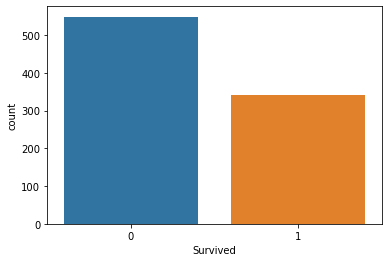

In [12]:
sns.countplot(x='Survived', data = df )

#### Sex :

- Les deux tiers des passagers sont des hommes.
- Même si les femmes était moins nombreux que les hommes, ils avaient plus de chance de survie.

In [13]:
print((len(df[df.Sex == 'male'])/len(df))*100,'% des passagers sont des hommes')
print((len(df[df.Sex == 'female'])/len(df))*100,'% des passagers sont des femmes')

64.75869809203144 % des passagers sont des hommes
35.24130190796858 % des passagers sont des femmes


<AxesSubplot:xlabel='Sex', ylabel='count'>

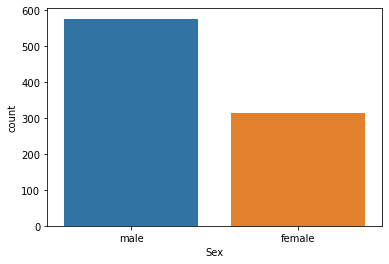

In [14]:
sns.countplot(x='Sex', data = df )

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

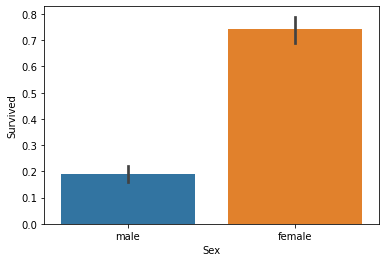

In [15]:
sns.barplot(x = 'Sex', y = 'Survived', data = df)

#### Pclass :
- Plus de la moitié des passagers sont en 3ème classe.
- Les passagers de 1ère classe avait plus de chance de survie (62%), suivis par ceux de 2ème classe (48%) et 3ème classe (23%).

<AxesSubplot:xlabel='Pclass', ylabel='count'>

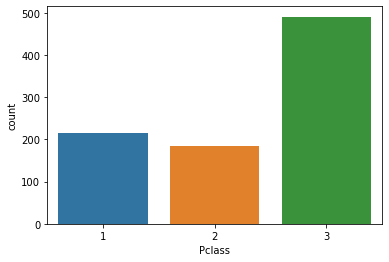

In [16]:
sns.countplot(x='Pclass', data = df )

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

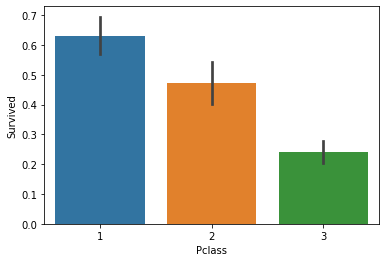

In [17]:
sns.barplot(data = df, x ='Pclass', y = 'Survived')

#### Station

<AxesSubplot:xlabel='Station', ylabel='count'>

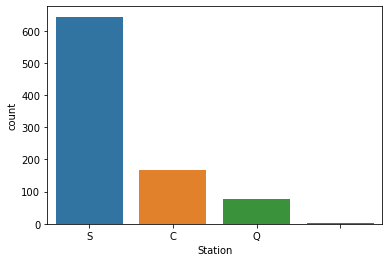

In [18]:
sns.countplot(x='Station', data = df )

Il existe apparement dans la colonne Station des valeurs vides qui n'ont pas été détécté comme étant manquantes. 

In [19]:
df.groupby('Station')['Station'].count()

Station
       2
C    168
Q     77
S    644
Name: Station, dtype: int64

Puisqu'il s'agit que de 2 valeurs on les remplace par la station la plus fréquente, à savoir S.

In [20]:
df.loc[df.Station == '', 'Station'] = 'S'

<AxesSubplot:xlabel='Station', ylabel='count'>

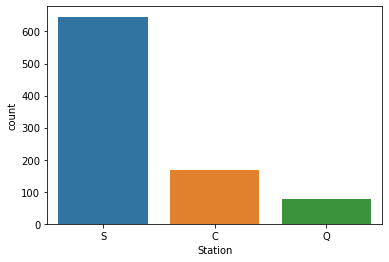

In [21]:
sns.countplot(x='Station', data = df )

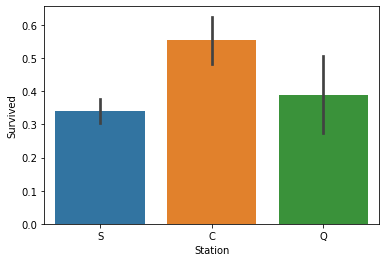

In [22]:
sns.barplot(data = df, x ='Station', y = 'Survived');

On remarque que les passagers qui sont montés depuis Carthagène ont plus de chance de survie par rapport aux autres stations.
Examinons cela de plus près en regardant d'autres variables

<AxesSubplot:xlabel='Station', ylabel='count'>

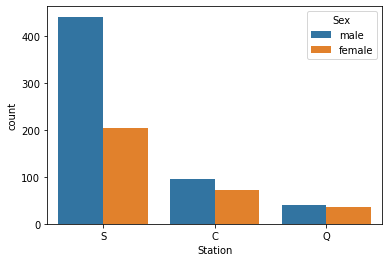

In [23]:
sns.countplot(data = df, x ='Station', hue = 'Sex')

<AxesSubplot:xlabel='Station', ylabel='count'>

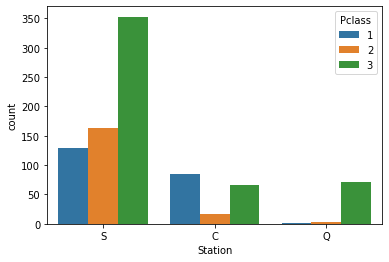

In [24]:
sns.countplot(data = df, x ='Station', hue = 'Pclass')

On peut donc justifier cela par le fait que les passagers ayant montés de Carthagène étaient à majorité en première classe (contrairement aux deux autres stations qui était majoritairements en 3ème classe) et ont ainsi plus de chance de survie. 

## Corrélation des variables non catégoriques :

### Ticket :
La colonne Ticket contient des valeurs très variées et complexes. Je décide de la supprimer.

In [25]:
df = df.drop('Ticket', axis=1)

### Fare :

D'après la matrice de corrélation, on remarque que la colonne Fare a une corrélation non négligeable avec la colonne Survived. Cependant, la distribution des valeurs de cette colonne est fortement asymétrique (skewness = 4,8) et il existe un grand nombre de valeurs extrêmes (outliers). Ces valeurs si on ne les traitent pas affecteront négativement la performance des modèles de prédiction. J'utiliserai la méthode IQR afin de définir des barrières de valeurs à ne pas dépasser, à savoir Q3 + 1,5*IQR et Q1 - 1,5*IQR.

In [26]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

75% des valeurs sont plus petits que 31, mais il existe tout de même des valeurs dépassant 500.

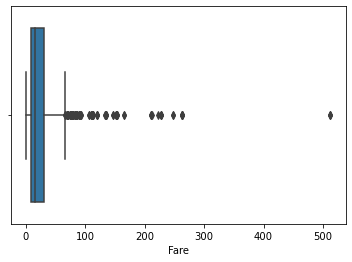

In [27]:
sns.boxplot(data = df, x = 'Fare')
plt.show()

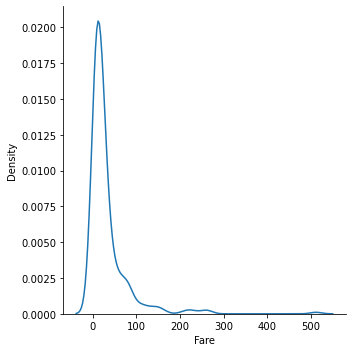

In [28]:
sns.displot(data=df, x="Fare", kind ='kde')

In [29]:
print('Fare skewness : ' , df['Fare'].skew())

Fare skewness :  4.787316519674893


In [30]:
#Calcul de IQR puis des barrières inf et max :
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
barrière_max=df['Fare'].quantile(0.75)+(IQR*1.5)
barrière_inf=df['Fare'].quantile(0.25)-(IQR*1.5)
print(barrière_max)
print(barrière_inf)

65.6344
-26.724


Toutes les valeurs de Fare étant supérieures ou égales à 0, on ne traitera que les valeurs supérieures à la barrière max.
Je remplace toutes les valeurs supérieures à cette barrière par 66 :

In [31]:
df.loc[df['Fare']>=66,'Fare']=66

La distribution et le boxplot après le traitement des valeurs extrêmes :

<AxesSubplot:xlabel='Fare'>

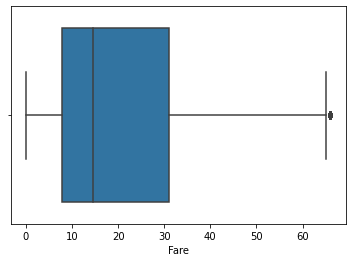

In [32]:
sns.boxplot(data = df, x = 'Fare')

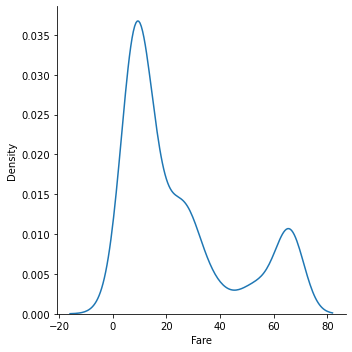

In [33]:
sns.displot(data=df, x="Fare", kind ='kde')

In [34]:
print('Fare skewness : ' , df['Fare'].skew())

Fare skewness :  1.0886952079299204


Vérifions maintenant la corrélation entre Fare et la survie des passagers :

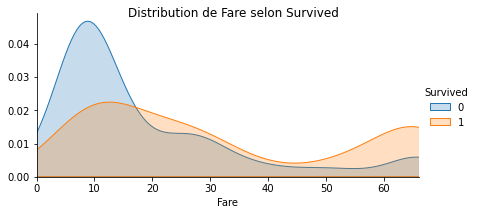

In [35]:
grid = sns.FacetGrid(df, hue="Survived",aspect=2, xlim=(0, df['Fare'].max()))
grid.map(sns.kdeplot,'Fare',shade= True)
grid.fig.suptitle('Distribution de Fare selon Survived')
grid.add_legend()
plt.show()

Les personnes ayant payés le plus avait plus de chances de survie, tandis que ceux qui ont payés le moins avait moins de chance de survie.

#### nb_siblings et nb_parents :
- Plus le nombre de nb_siblings augmente plus les chances de survie diminuent
- Je crée tout d'abord une nouvelle variable que j'appelle nb_family qui est égale à la somme de nb_parents et nb_siblings
- Les passagers ayant entre 1 et 3 membres de familles les accomagant ont beaucoup plus de chance de survie. Je divise nb_Family en trois variables prenant des valeurs binaires : F0 = 1 si nb_family = 0, F1 = 1 si nb_ family est entre 1 et 3, et F2 = 1 si nb_family est supérieur à 3.
- Je supprime ensuite les variables nb_siblings, nb_parents et nb_family

<AxesSubplot:xlabel='nb_siblings', ylabel='Survived'>

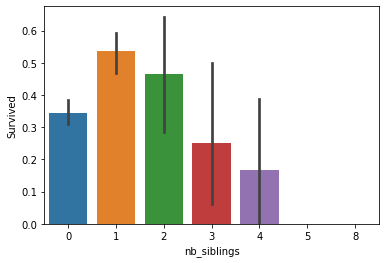

In [36]:
sns.barplot(x="nb_siblings",y="Survived",data=df)

<AxesSubplot:xlabel='nb_parents', ylabel='Survived'>

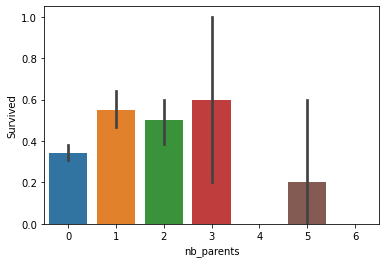

In [37]:
sns.barplot(x="nb_parents",y="Survived",data=df)

In [38]:
#Création de la variable nb_family
df['nb_family'] = (df['nb_siblings'] + df['nb_parents'])
df.head()

,Survived,Pclass,Name,Sex,Age,nb_siblings,nb_parents,Fare,Station,nb_family
0,0,3,Braund Mr. Owen Harris,male,22.0,1,0,7.250,S,1
1,1,1,Cumings Mrs. John Bradley (Florence Briggs Tha...,female,38.0,1,0,66.000,C,1
2,1,3,Heikkinen Miss. Laina,female,26.0,0,0,7.925,S,0
3,1,1,Futrelle Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,53.100,S,1
4,0,3,Allen Mr. William Henry,male,35.0,0,0,8.050,S,0


<AxesSubplot:xlabel='nb_family', ylabel='Survived'>

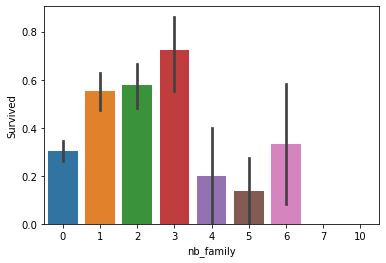

In [39]:
sns.barplot(x="nb_family",y="Survived",data=df)

In [40]:
[]
df.loc[(df['nb_family'] == 0),'F0']=1
df.loc[(df['nb_family'] != 0),'F0']=0


df.loc[(df['nb_family']>=1) & (df['nb_family']<=3),'F1']=1
df.loc[(df['nb_family'] == 0) | (df['nb_family']>3),'F1']=0

df.loc[(df['nb_family'] >= 4),'F2']=1
df.loc[(df['nb_family'] < 4),'F2']=0


In [41]:
#on supprime une des 3 colonnes car si on a l'information sur deux colonnes on peut déduire l'information sur l'autre
df.drop('F2', axis=1, inplace = True)

In [42]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,nb_siblings,nb_parents,Fare,nb_family,F0,F1
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.317350,0.016639,-0.203367,0.279855
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.715103,0.065997,0.135207,-0.223551
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.151967,-0.301914,0.198270,-0.083059
nb_siblings,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.331658,0.890712,-0.584471,0.213225
nb_parents,0.081629,0.018443,-0.189119,0.414838,1.000000,0.292024,0.783111,-0.583398,0.265863
Fare,0.317350,-0.715103,0.151967,0.331658,0.292024,1.000000,0.372567,-0.453557,0.366521
nb_family,0.016639,0.065997,-0.301914,0.890712,0.783111,0.372567,1.000000,-0.690922,0.278553
F0,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.453557,-0.690922,1.000000,-0.859931
F1,0.279855,-0.223551,-0.083059,0.213225,0.265863,0.366521,0.278553,-0.859931,1.000000


#### Name :
La variable Name contient une information imporante à savoir le titre honorifique des passagers (Mr, Major, Don ...). Après extraction des titres dans la colonne honorific on remarque les passagères ayant le titre Mrs ont le plus de chance de survie.


In [43]:
#Création de la colonne honorific
df['honorific'] = df['Name'].str.extract('(\w*)\.')

In [44]:
#Nombre de passagers par titre honorifique
df.honorific.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Lady          1
Ms            1
Jonkheer      1
Don           1
Mme           1
Capt          1
Countess      1
Sir           1
Name: honorific, dtype: int64

In [45]:
#On regarde la moyenne d'age de chaque titre honorifique
df.groupby(['honorific'])['Survived'].agg(['mean','count']).sort_values(by='count', ascending = False)

,mean,count
honorific,,
Mr,0.156673,517
Miss,0.697802,182
Mrs,0.792000,125
Master,0.575000,40
Dr,0.428571,7
Rev,0.000000,6
Major,0.500000,2
Col,0.500000,2
Mlle,1.000000,2


In [46]:
#On garde le top 4 des titres honorifiques les plus fréquents, tout en remplaçant 'Mlle' et 'Ms' par 'Miss', 'Mme' par 'Mrs'
#et en remplaçant les autres titres par 'high_status'
fr_honorifics = ['Mr','Miss','Mrs','Master']
high_status = ['Countess','Sir','Lady','Don','Rev','Major','Jonkheer','Col','Capt','Dr']
df['honorific'] = df['honorific'].map(lambda x : 'Miss' if x in ['Mlle','Ms'] else x)
df['honorific'] = df['honorific'].map(lambda x : 'Mrs' if x=='Mme' else x)
df['honorific'] = df['honorific'].map(lambda x : 'high_status' if x in high_status else x)

In [47]:
df.groupby(['honorific'])['honorific'].agg(['count'])

,count
honorific,
Master,40
Miss,185
Mr,517
Mrs,126
high_status,23


<AxesSubplot:xlabel='honorific', ylabel='Survived'>

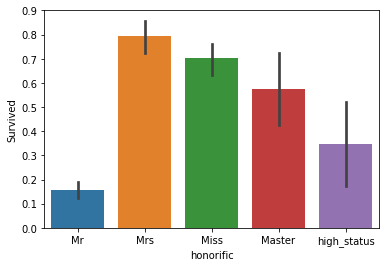

In [48]:
sns.barplot(x="honorific",y="Survived",data=df)

#### Age :
- La colonne Age contient des valeurs extrêmes, cependant la distribution est symétrique et semblable à une loi normale.
- Les passagers de moins de 14 ans avait plus de chance de survie, tandis que ceux ayant plus de 60 ans en avait moins 
- On remarque que 'Pclass', 'honorific' et F0 sont corrélés avec l'age des passagers. On remplace les valeaurs d'Age manquantes en prenant les moyennes sur ces colonnes.


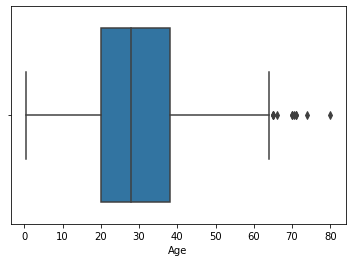

In [49]:
sns.boxplot(x = 'Age', data = df)
plt.show()

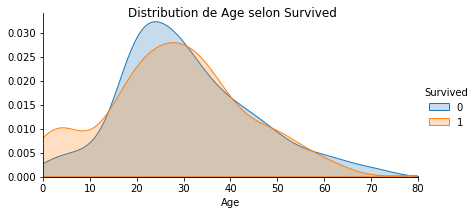

In [50]:

grid = sns.FacetGrid(df, hue="Survived",aspect=2, xlim=(0, df['Age'].max()))
grid.map(sns.kdeplot,'Age',shade= True)
grid.fig.suptitle('Distribution de Age selon Survived')
grid.add_legend()
plt.show()

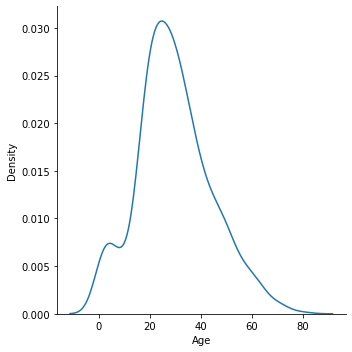

In [51]:
sns.displot(data=df, x="Age", kind ='kde')

In [52]:
df['Age'].skew()

0.38910778230082704

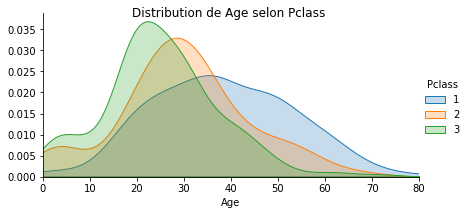

In [53]:
grid = sns.FacetGrid(df, hue="Pclass",aspect=2, xlim=(0, df['Age'].max()))
grid.map(sns.kdeplot,'Age',shade= True)
grid.fig.suptitle('Distribution de Age selon Pclass')
grid.add_legend()
plt.show()

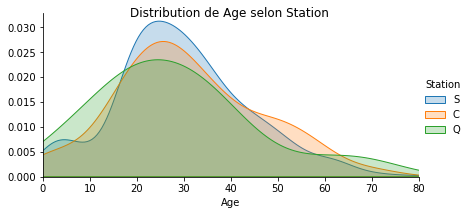

In [54]:
grid = sns.FacetGrid(df, hue="Station",aspect=2, xlim=(0, df['Age'].max()))
grid.map(sns.kdeplot,'Age',shade= True)
grid.fig.suptitle('Distribution de Age selon Station')
grid.add_legend()
plt.show()

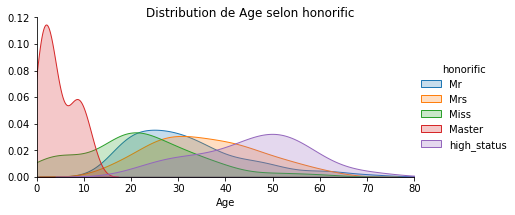

In [55]:
grid = sns.FacetGrid(df, hue="honorific",aspect=2, xlim=(0, df['Age'].max()))
grid.map(sns.kdeplot,'Age',shade= True)
grid.fig.suptitle('Distribution de Age selon honorific')
grid.add_legend()
plt.show()

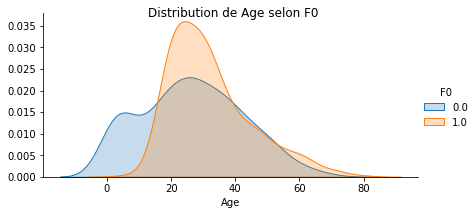

In [56]:
grid = sns.FacetGrid(df, hue="F0",aspect=2)
grid.map(sns.kdeplot,'Age',shade= True)
grid.fig.suptitle('Distribution de Age selon F0')
grid.add_legend()
plt.show()

In [57]:
#La moyenne d'age par classe et titre honorifique
df.groupby(['honorific','Pclass'])['Age'].agg(['mean', 'count'])

mean  count
honorific   Pclass                  
Master      1        5.306667      3
            2        2.258889      9
            3        5.350833     24
Miss        1       29.744681     47
            2       22.560606     33
            3       16.123188     69
Mr          1       41.580460     87
            2       32.768293     82
            3       28.724891    229
Mrs         1       40.400000     35
            2       33.682927     41
            3       33.515152     33
high_status 1       47.571429     14
            2       42.000000      8

In [58]:
#la mooyenne d'age par F0 et titre honrifique :
df.groupby(['honorific','F0'])['Age'].agg(['mean', 'count'])

mean  count
honorific   F0                   
Master      0.0   4.574167     36
Miss        0.0  14.926471     68
            1.0  27.654321     81
Mr          0.0  32.313084    107
            1.0  32.388316    291
Mrs         0.0  34.869565     92
            1.0  40.764706     17
high_status 0.0  49.000000      7
            1.0  43.933333     15

F0 influe fortement sur l'age des des jeunes femmes non mariées. 

In [59]:
df[(df.honorific == 'Miss')].groupby(['honorific','Pclass','F0'])['Age'].agg(['mean', 'count'])

mean  count
honorific Pclass F0                   
Miss      1      0.0  25.714286     21
                 1.0  33.000000     26
          2      0.0  11.714286     14
                 1.0  30.552632     19
          3      0.0   9.424242     33
                 1.0  22.263889     36

In [60]:
#Remplacement des valeurs manquantes
df.loc[(df.Age.isnull())&(df.honorific=='Master')&((df.Pclass==1)|(df.Pclass==3)),'Age'] = 5
df.loc[(df.Age.isnull())&(df.honorific=='Master')&(df.Pclass==2),'Age'] = 2
df.loc[(df.Age.isnull())&(df.honorific=='Mr')&(df.Pclass==1),'Age'] = 42
df.loc[(df.Age.isnull())&(df.honorific=='Mr')&(df.Pclass==2),'Age'] = 33
df.loc[(df.Age.isnull())&(df.honorific=='Mr')&(df.Pclass==3),'Age'] = 29
df.loc[(df.Age.isnull())&(df.honorific=='Mrs')&(df.Pclass==1),'Age'] = 40
df.loc[(df.Age.isnull())&(df.honorific=='Mrs')&((df.Pclass==2)|(df.Pclass==3)),'Age'] = 34
df.loc[(df.Age.isnull())&(df.honorific=='high_status')&(df.Pclass==1),'Age'] = 48
df.loc[(df.Age.isnull())&(df.honorific=='high_status')&(df.Pclass==2),'Age'] = 42

df.loc[(df.Age.isnull())&(df.honorific=='Miss')&(df.Pclass==1)&(df.F0==0),'Age'] = 33
df.loc[(df.Age.isnull())&(df.honorific=='Miss')&(df.Pclass==1)&(df.F0==1),'Age'] = 26
df.loc[(df.Age.isnull())&(df.honorific=='Miss')&(df.Pclass==2)&(df.F0==0),'Age'] = 31
df.loc[(df.Age.isnull())&(df.honorific=='Miss')&(df.Pclass==2)&(df.F0==1),'Age'] = 12
df.loc[(df.Age.isnull())&(df.honorific=='Miss')&(df.Pclass==3)&(df.F0==0),'Age'] = 22
df.loc[(df.Age.isnull())&(df.honorific=='Miss')&(df.Pclass==3)&(df.F0==1),'Age'] = 9

In [61]:
df.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age            0
nb_siblings    0
nb_parents     0
Fare           0
Station        0
nb_family      0
F0             0
F1             0
honorific      0
dtype: int64

In [62]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,nb_siblings,nb_parents,Fare,nb_family,F0,F1
Survived,1.000000,-0.338481,-0.089084,-0.035322,0.081629,0.317350,0.016639,-0.203367,0.279855
Pclass,-0.338481,1.000000,-0.400777,0.083081,0.018443,-0.715103,0.065997,0.135207,-0.223551
Age,-0.089084,-0.400777,1.000000,-0.253056,-0.180291,0.171712,-0.263025,0.171315,-0.059394
nb_siblings,-0.035322,0.083081,-0.253056,1.000000,0.414838,0.331658,0.890712,-0.584471,0.213225
nb_parents,0.081629,0.018443,-0.180291,0.414838,1.000000,0.292024,0.783111,-0.583398,0.265863
Fare,0.317350,-0.715103,0.171712,0.331658,0.292024,1.000000,0.372567,-0.453557,0.366521
nb_family,0.016639,0.065997,-0.263025,0.890712,0.783111,0.372567,1.000000,-0.690922,0.278553
F0,-0.203367,0.135207,0.171315,-0.584471,-0.583398,-0.453557,-0.690922,1.000000,-0.859931
F1,0.279855,-0.223551,-0.059394,0.213225,0.265863,0.366521,0.278553,-0.859931,1.000000


In [63]:
#Suppression des colonnes 
df.drop(['Name','nb_siblings','nb_parents','nb_family'], axis=1, inplace = True)

In [64]:
#df.drop('F1', axis=1, inplace = True)

### Transformation des données :
On transforme les valeurs Str en numériques. Pour les colonnes Station et honorific on utilise la technique du 'One Hot Encoding'.

#### Sex :

In [65]:
df['Sex'] = df['Sex'].map(lambda x : 0 if x=='male' else 1)

In [66]:
df

,Survived,Pclass,Sex,Age,Fare,Station,F0,F1,honorific
0,0,3,0,22.0,7.250,S,0.0,1.0,Mr
1,1,1,1,38.0,66.000,C,0.0,1.0,Mrs
2,1,3,1,26.0,7.925,S,1.0,0.0,Miss
3,1,1,1,35.0,53.100,S,0.0,1.0,Mrs
4,0,3,0,35.0,8.050,S,1.0,0.0,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.000,S,1.0,0.0,high_status
887,1,1,1,19.0,30.000,S,1.0,0.0,Miss
888,0,3,1,22.0,23.450,S,0.0,1.0,Miss
889,1,1,0,26.0,30.000,C,1.0,0.0,Mr


### One hot encoding :

#### Station :

In [67]:
dummies = pd.get_dummies(df.Station)
dummies

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [68]:
df = pd.concat([df,dummies],axis=1)

In [69]:
df.drop('Station', axis = 1, inplace = True)

In [70]:
#On supprime une des 3 colonnes créés puisque toute l'information peut être stockés dans deux colonnes (Si Q=0 et C =0 alors S =1)
df.drop('S', axis = 1, inplace = True)

In [71]:
df

,Survived,Pclass,Sex,Age,Fare,F0,F1,honorific,C,Q
0,0,3,0,22.0,7.250,0.0,1.0,Mr,0,0
1,1,1,1,38.0,66.000,0.0,1.0,Mrs,1,0
2,1,3,1,26.0,7.925,1.0,0.0,Miss,0,0
3,1,1,1,35.0,53.100,0.0,1.0,Mrs,0,0
4,0,3,0,35.0,8.050,1.0,0.0,Mr,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.000,1.0,0.0,high_status,0,0
887,1,1,1,19.0,30.000,1.0,0.0,Miss,0,0
888,0,3,1,22.0,23.450,0.0,1.0,Miss,0,0
889,1,1,0,26.0,30.000,1.0,0.0,Mr,1,0


#### honorific :

In [72]:
dummies = pd.get_dummies(df.honorific)
dummies

,Master,Miss,Mr,Mrs,high_status
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
886,0,0,0,0,1
887,0,1,0,0,0
888,0,1,0,0,0
889,0,0,1,0,0


In [73]:
df = pd.concat([df,dummies],axis=1)

In [74]:
df.drop('honorific', axis = 1, inplace = True)

In [75]:
df.drop('high_status', axis = 1, inplace = True)

### Dataframe final :

In [76]:
df

,Survived,Pclass,Sex,Age,Fare,F0,F1,C,Q,Master,Miss,Mr,Mrs
0,0,3,0,22.0,7.250,0.0,1.0,0,0,0,0,1,0
1,1,1,1,38.0,66.000,0.0,1.0,1,0,0,0,0,1
2,1,3,1,26.0,7.925,1.0,0.0,0,0,0,1,0,0
3,1,1,1,35.0,53.100,0.0,1.0,0,0,0,0,0,1
4,0,3,0,35.0,8.050,1.0,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.000,1.0,0.0,0,0,0,0,0,0
887,1,1,1,19.0,30.000,1.0,0.0,0,0,0,1,0,0
888,0,3,1,22.0,23.450,0.0,1.0,0,0,0,1,0,0
889,1,1,0,26.0,30.000,1.0,0.0,1,0,0,0,1,0


In [77]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Sex,Age,Fare,F0,F1,C,Q,Master,Miss,Mr,Mrs
Survived,1.000000,-0.338481,0.543351,-0.089084,0.317350,-0.203367,0.279855,0.168240,0.003650,0.085221,0.335636,-0.549199,0.341994
Pclass,-0.338481,1.000000,-0.131900,-0.400777,-0.715103,0.135207,-0.223551,-0.243292,0.221009,0.082081,-0.010261,0.142698,-0.153758
Sex,0.543351,-0.131900,1.000000,-0.134474,0.235079,-0.303646,0.260747,0.082853,0.074115,-0.159934,0.693916,-0.867334,0.550146
Age,-0.089084,-0.400777,-0.134474,1.000000,0.171712,0.171315,-0.059394,0.056292,-0.128852,-0.392186,-0.333713,0.239487,0.194244
Fare,0.317350,-0.715103,0.235079,0.171712,1.000000,-0.453557,0.366521,0.263899,-0.171102,0.069939,0.092350,-0.270647,0.205513
F0,-0.203367,0.135207,-0.303646,0.171315,-0.453557,1.000000,-0.859931,-0.095298,0.086464,-0.267024,-0.048054,0.396920,-0.361624
F1,0.279855,-0.223551,0.260747,-0.059394,0.366521,-0.859931,1.000000,0.158586,-0.087093,0.102668,-0.009600,-0.292792,0.368543
C,0.168240,-0.243292,0.082853,0.056292,0.263899,-0.095298,0.158586,1.000000,-0.148258,-0.035225,0.036204,-0.072567,0.067872
Q,0.003650,0.221009,0.074115,-0.128852,-0.171102,0.086464,-0.087093,-0.148258,1.000000,0.010478,0.167531,-0.078338,-0.090432
Master,0.085221,0.082081,-0.159934,-0.392186,0.069939,-0.267024,0.102668,-0.035225,0.010478,1.000000,-0.110981,-0.254903,-0.087987


.




.























## 3. Modélisation : <a class="anchor" id="chapter3"></a>

Le problème que nous sommes entrain de traiter est une classification binaire. Il y'a un grand nombres d'algorithmes qui traitent ce type de problème. On choisit les plus populaires :
- Logistic Regression
- SVM
- Random Forest
- Naive Bayes
- Decision Tree
- KNN
- XGBoost

In [78]:
#Split des données en utilisant stratify sur la colonne Survived, afin de garantir la même répartition de survivants dans Train et Test
train, test = train_test_split(df, test_size = 0.3, stratify=df.Survived)

In [79]:
#On sépare les variables en features et target
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1)
Y_test = test['Survived']
print("shape of X_train",X_train.shape)
print("Shape of Y_train",Y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of Y_test",Y_test.shape)

shape of X_train (623, 12)
Shape of Y_train (623,)
Shape of X_test (268, 12)
Shape of Y_test (268,)


### Logistic Regression :

In [80]:
logreg = LogisticRegression(max_iter = 400)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

In [81]:
from sklearn.metrics import classification_report
report = classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       165
           1       0.81      0.78      0.79       103

    accuracy                           0.84       268
   macro avg       0.84      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268



### Support Vector Machine (SVM) :

In [82]:
SVM = svm.SVC()
SVM.fit(X_train, Y_train)
Y_pred = SVM.predict(X_test)

In [83]:
from sklearn.metrics import classification_report
report = classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       165
           1       0.65      0.27      0.38       103

    accuracy                           0.66       268
   macro avg       0.66      0.59      0.58       268
weighted avg       0.66      0.66      0.62       268



### Random Forest :

In [84]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

In [85]:
from sklearn.metrics import classification_report
report = classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       165
           1       0.77      0.70      0.73       103

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



### Gaussian Naive Bayes :

In [86]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)
Y_pred = naive_bayes.predict(X_test)

In [87]:
from sklearn.metrics import classification_report
report = classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       165
           1       0.73      0.78      0.75       103

    accuracy                           0.81       268
   macro avg       0.79      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



### Decision Tree :

In [88]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

In [89]:
from sklearn.metrics import classification_report
report = classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       165
           1       0.72      0.61      0.66       103

    accuracy                           0.76       268
   macro avg       0.75      0.73      0.74       268
weighted avg       0.75      0.76      0.75       268



### K-Nearest Neighbors :

In [90]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

In [91]:
from sklearn.metrics import classification_report
report = classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       165
           1       0.67      0.54      0.60       103

    accuracy                           0.72       268
   macro avg       0.71      0.69      0.70       268
weighted avg       0.72      0.72      0.72       268



### XGBoost :

In [92]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)

In [93]:
from sklearn.metrics import classification_report
report = classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       165
           1       0.78      0.72      0.75       103

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



### Classement des modèles :

In [94]:
d= {'modèle': ["KNN","Decision Tree", "Naive Bayes","SVM","Random Forest","Regression Logistique","XGBoost" ],
    'score': [knn.score(X_test,Y_test),decision_tree.score(X_test,Y_test),naive_bayes.score(X_test,Y_test),SVM.score(X_test,Y_test),
              random_forest.score(X_test,Y_test),logreg.score(X_test,Y_test),xgb.score(X_test,Y_test)]}
#on crée le dataframe et on l'affiche
df_scores = pd.DataFrame(data=d)
df_scores.sort_values(by=["score"], ascending=False)

,modèle,score
5,Regression Logistique,0.843284
6,XGBoost,0.813433
2,Naive Bayes,0.805970
4,Random Forest,0.802239
1,Decision Tree,0.757463
0,KNN,0.723881
3,SVM,0.664179


## Conclusion : <a class="anchor" id="chapter4"></a>

Durant ce projet on a pu comprendre quels critères influencent la survie ou la mort des passagers, et développer 7 modèles de prédiction, où la régression logistique était la performant avec une accuarcy de 85%.
